<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 150.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
missing_percent = (df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum().mean()) * 100
print(pd.DataFrame({
    'Missing Values' : missing_data,
    'Percentage (%)' : missing_percent
}))
df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
# df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()


            Missing Values  Percentage (%)
Employment               0    1.564733e+06
JobSat               36311    1.564733e+06
RemoteWork           10631    1.564733e+06


/tmp/ipykernel_301/3257828924.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)
/tmp/ipykernel_301/3257828924.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceRange  JobSat
0             0-5     8.0
1            5-10     8.0
2           10-20     8.0
3             >20     8.0


/tmp/ipykernel_301/3738658005.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro_numeric'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_301/3738658005.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_301/3738658005.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

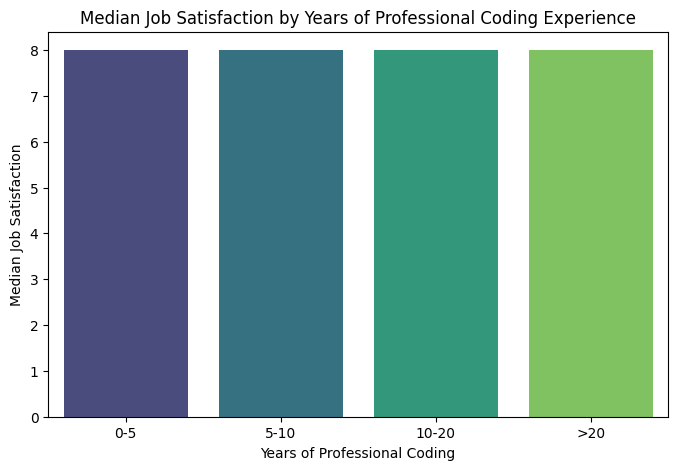

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Clean YearsCodePro
def clean_years(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return np.nan

df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(clean_years)

# Drop rows with missing YearsCodePro or JobSat
df_clean = df.dropna(subset=['YearsCodePro_numeric', 'JobSat'])

# Create experience ranges
bins = [0, 5, 10, 20, df_clean['YearsCodePro_numeric'].max()]
labels = ['0-5', '5-10', '10-20', '>20']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro_numeric'], bins=bins, labels=labels, right=False)

# Median JobSat by experience range
median_jobsat = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_jobsat)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=median_jobsat, x='ExperienceRange', y='JobSat', palette='viridis')
plt.title("Median Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding")
plt.ylabel("Median Job Satisfaction")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

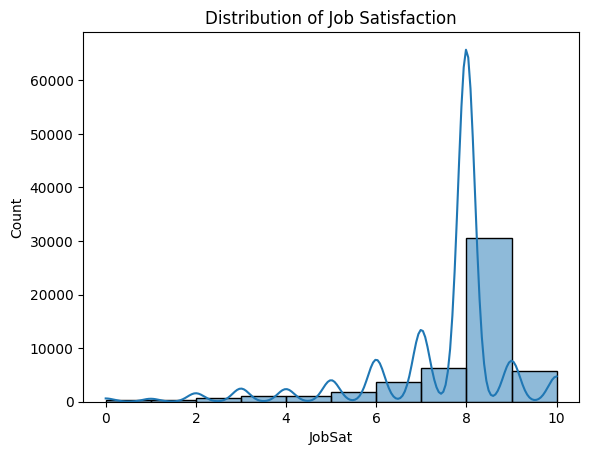

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution
sns.histplot(df_clean['JobSat'], bins=10, kde=True)
plt.title("Distribution of Job Satisfaction")
plt.xlabel("JobSat")
plt.show


In [9]:
df_clean['ExperienceRange'].value_counts()

ExperienceRange
0-5      16971
10-20    13327
5-10     12928
>20       8334
Name: count, dtype: int64

/tmp/ipykernel_301/212792169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_jobsat = df_clean.groupby('ExperienceRange')['JobSat'].mean().reset_index()
/tmp/ipykernel_301/212792169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='ExperienceRange', y='JobSat', palette='viridis')


  ExperienceRange    JobSat
0             0-5  7.359555
1            5-10  7.335087
2           10-20  7.449163
3             >20  7.641949


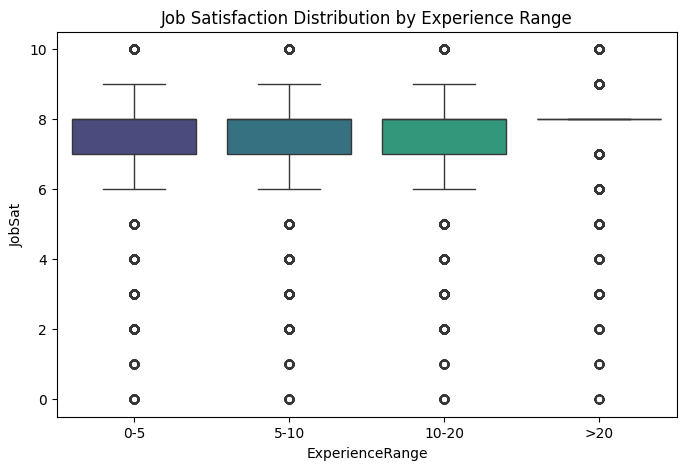

In [10]:
#using median 
mean_jobsat = df_clean.groupby('ExperienceRange')['JobSat'].mean().reset_index()
print(mean_jobsat)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='ExperienceRange', y='JobSat', palette='viridis')
plt.title("Job Satisfaction Distribution by Experience Range")
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/3331403920.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='JobSat', palette='viridis')


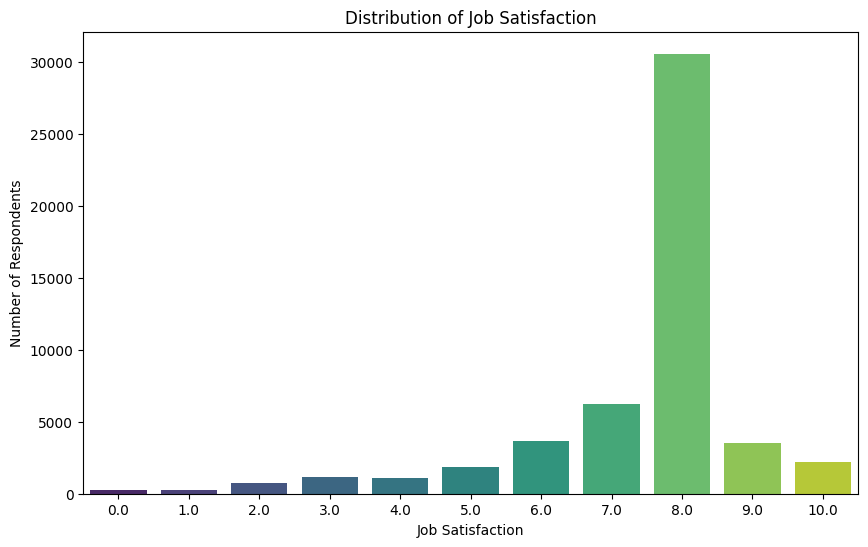

In [11]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as pyplotlt

#count plot for job satisfaction
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='JobSat', palette='viridis')
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of Respondents")
plt.xticks(rotation = 0)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/3116644734.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, palette="Set2")


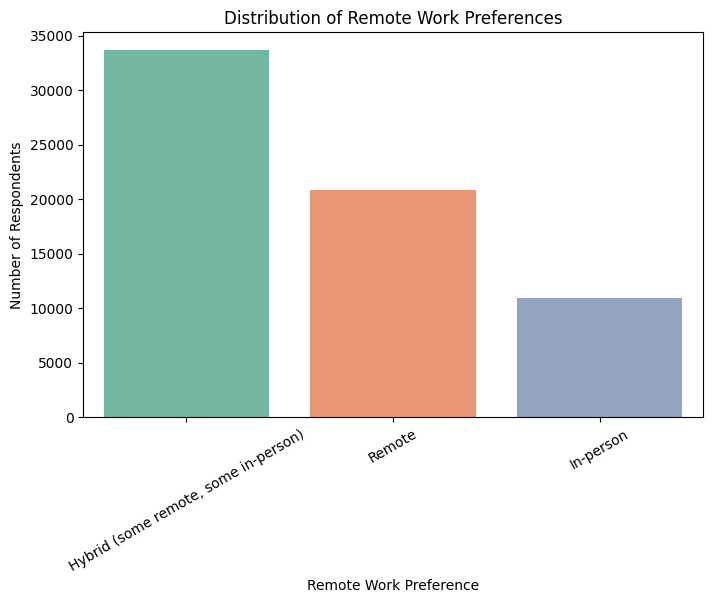

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                              

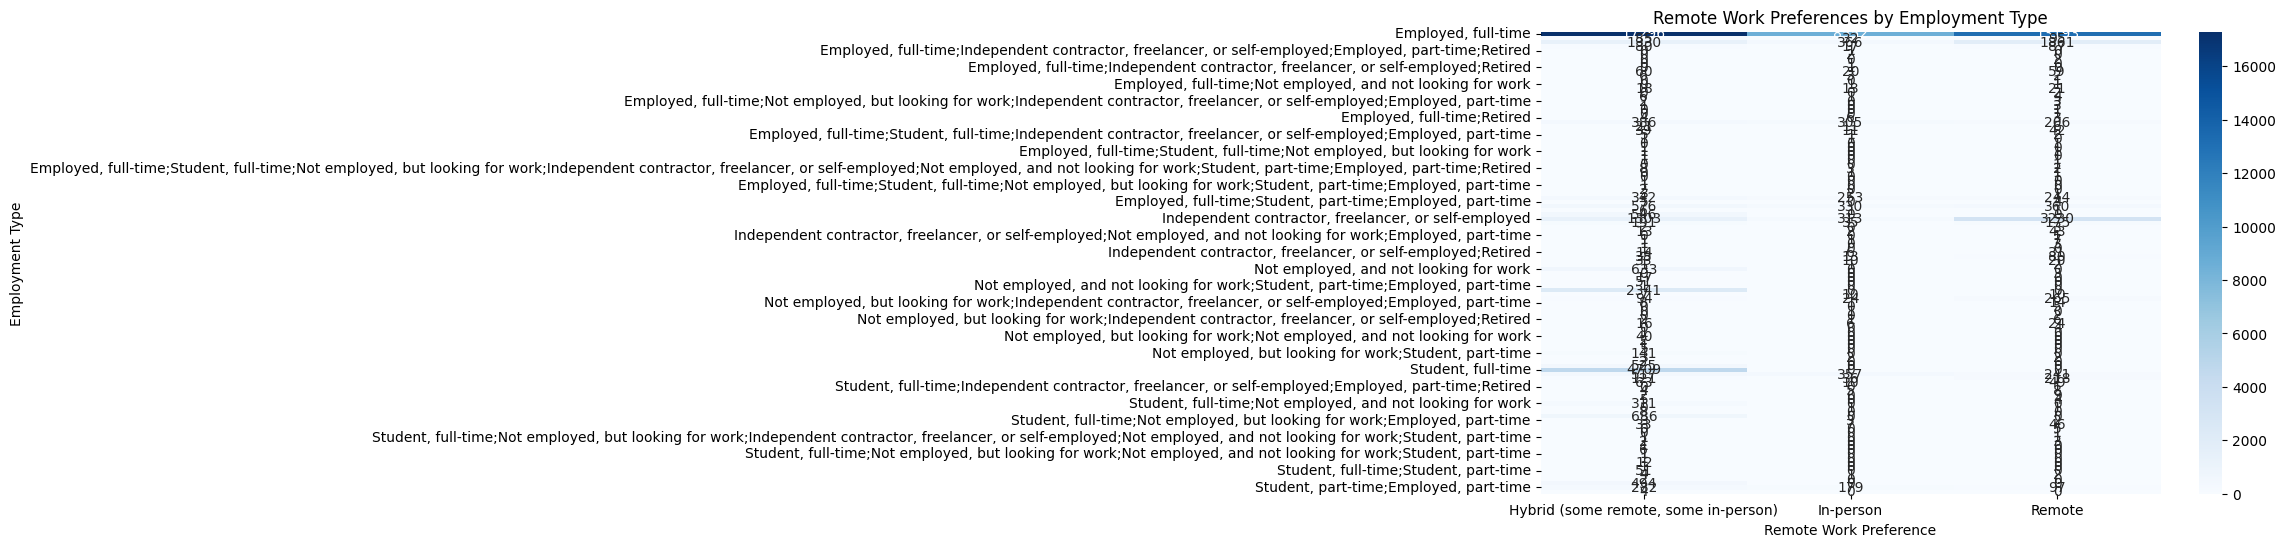

RemoteWork                                          Hybrid (some remote, some in-person)  \
MainBranch                                                                                 
I am a developer by profession                                                     22751   
I am learning to code                                                               3198   
I am not primarily a developer, but I write cod...                                  4002   
I code primarily as a hobby                                                         2732   
I used to be a developer by profession, but no ...                                   963   

RemoteWork                                          In-person  Remote  
MainBranch                                                             
I am a developer by profession                           8697   18759  
I am learning to code                                     412     265  
I am not primarily a developer, but I write cod...       1289    12

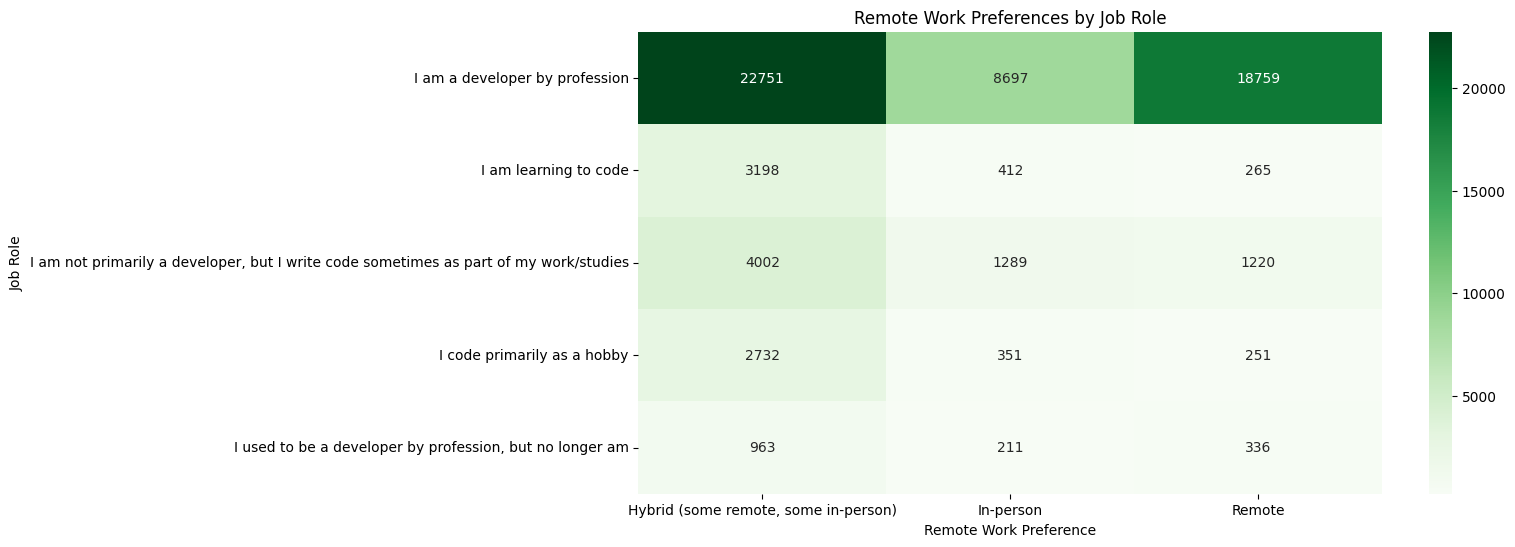

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, palette="Set2")

plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=30)
plt.show()

#cross-tabulate with employment type
remote_emp_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_emp_crosstab)

# Optional: heatmap for better visualization
plt.figure(figsize=(10,6))
sns.heatmap(remote_emp_crosstab, annot=True, fmt='d', cmap="Blues")
plt.title("Remote Work Preferences by Employment Type")
plt.ylabel("Employment Type")
plt.xlabel("Remote Work Preference")
plt.show()

#cross-tabulate with job roles
remote_job_crosstab = pd.crosstab(df['MainBranch'], df['RemoteWork'])
print(remote_job_crosstab.head())

plt.figure(figsize=(12,6))
sns.heatmap(remote_job_crosstab, annot=True, fmt='d', cmap="Greens")
plt.title("Remote Work Preferences by Job Role")
plt.ylabel("Job Role")
plt.xlabel("Remote Work Preference")
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_301/1616862619.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_langs = lang_counts.groupby('Country').apply(
/tmp/ipykernel_301/1616862619.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


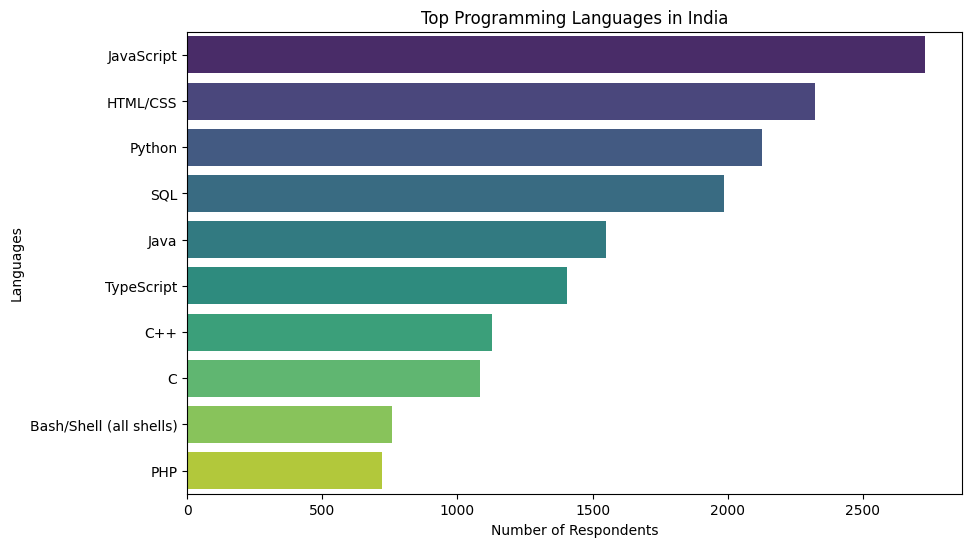

In [13]:
## Write your code here
lang_region = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split languages into list
lang_region['LanguageHaveWorkedWith'] = lang_region['LanguageHaveWorkedWith'].str.split(';')

# Explode into multiple rows
lang_region = lang_region.explode('LanguageHaveWorkedWith')

# Clean whitespace
lang_region['LanguageHaveWorkedWith'] = lang_region['LanguageHaveWorkedWith'].str.strip()

# Count frequency of languages by region
lang_counts = lang_region.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Example: Top 10 languages per region
top_langs = lang_counts.groupby('Country').apply(
    lambda x: x.nlargest(10, 'Count')
).reset_index(drop=True)

plt.figure(figsize=(10,6))
region = "India"   # Example region
sns.barplot(
    data=top_langs[top_langs['Country'] == region],
    x="Count", y="LanguageHaveWorkedWith", palette="viridis"
)
plt.title(f"Top Programming Languages in {region}")
plt.xlabel("Number of Respondents")
plt.ylabel("Languages")
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


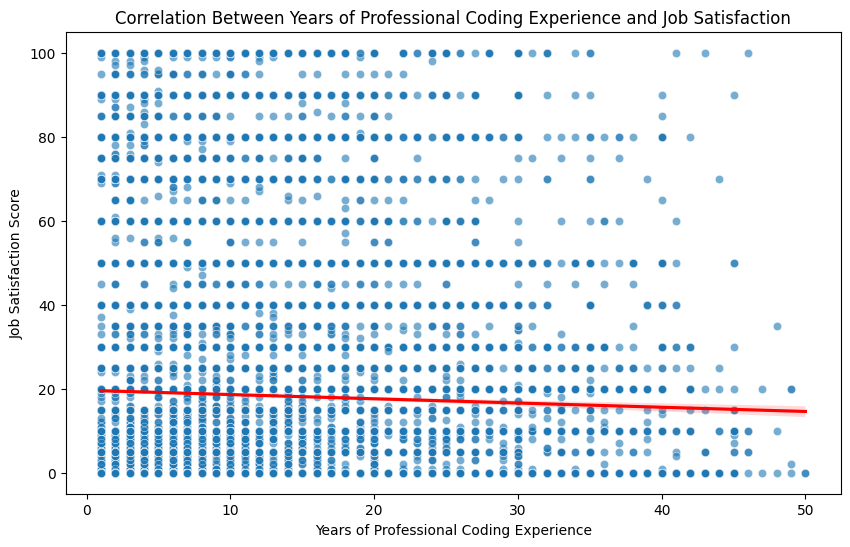

In [14]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

exp_sat_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data = exp_sat_df,
    x='YearsCodePro',
    y='JobSatPoints_1',
    alpha=0.6
)

#trendline
sns.regplot(
    data = exp_sat_df,
    x='YearsCodePro',
    y= 'JobSatPoints_1',
    scatter= False,
    color='red'
)

plt.title('Correlation Between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


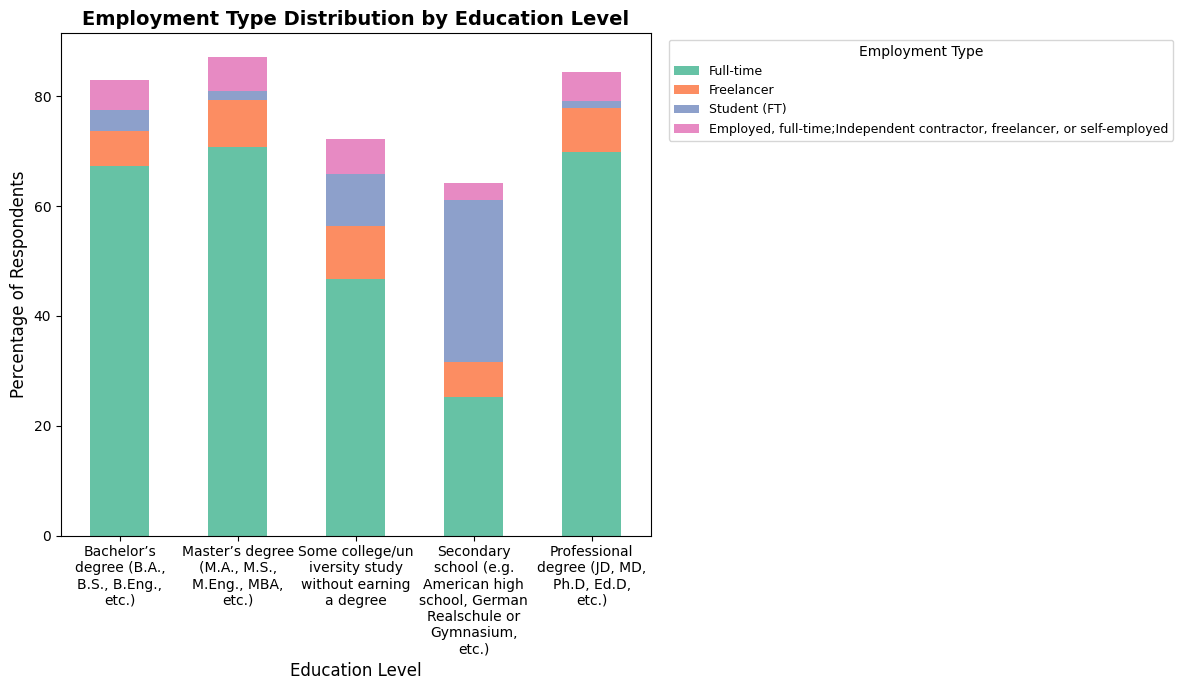

In [22]:
## Write your code here
# # Cross-tabulation of EdLevel and Employment
# edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])
# # print(edu_emp_crosstab.head())

# # Normalized (percentage within each education level)
# edu_emp_crosstab_pct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
# # print(edu_emp_crosstab_pct.round(2).head())

# #visulaization using stacked barplot
# edu_emp_crosstab_pct.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")

# plt.title("Employment Type Distribution by Education Level")
# plt.xlabel("Education Level")
# plt.ylabel("Percentage of Respondents")
# plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45, ha="right")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Shorten employment labels properly
df['Employment_clean'] = df['Employment'].replace({
    "Employed, full-time": "Full-time",
    "Employed, part-time": "Part-time",
    "Independent contractor, freelancer, or self-employed": "Freelancer",
    "Not employed, but looking for work": "Unemployed",
    "Retired": "Retired",
    "Student, full-time": "Student (FT)",
    "Student, part-time": "Student (PT)"
})

# Top categories
top_edu = df['EdLevel'].value_counts().head(5).index
top_emp = df['Employment_clean'].value_counts().head(4).index

edu_emp_crosstab_pct = pd.crosstab(
    df['EdLevel'], df['Employment_clean'], normalize='index'
).loc[top_edu, top_emp] * 100


# Plot 
ax = edu_emp_crosstab_pct.plot(
    kind="bar", stacked=True, figsize=(12,7),
    color=sns.color_palette("Set2", len(top_emp))
)

plt.title("Employment Type Distribution by Education Level", fontsize=14, weight="bold")
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Percentage of Respondents", fontsize=12)

# Wrap and set labels
labels = [textwrap.fill(label, 15) for label in edu_emp_crosstab_pct.index]
ax.set_xticklabels(labels, rotation=0, ha="center")

# Legend formatting
plt.legend(title="Employment Type", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [23]:
## Write your code here
# Save cleaned & modified dataset to CSV
df.to_csv("modified_dataset.csv", index=False)

print("Modified dataset is saved as 'modified_dataset.csv'")


Modified dataset is saved as 'modified_dataset.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
